variances of each feature [72.96244541329987, 22.85076178670177, 3.668921889282873, 0.5178709107154954]


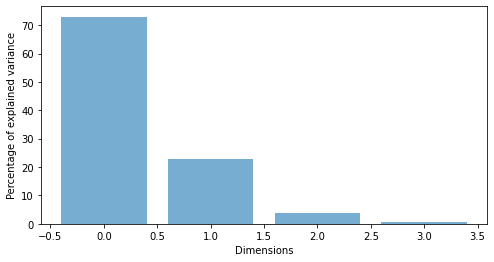

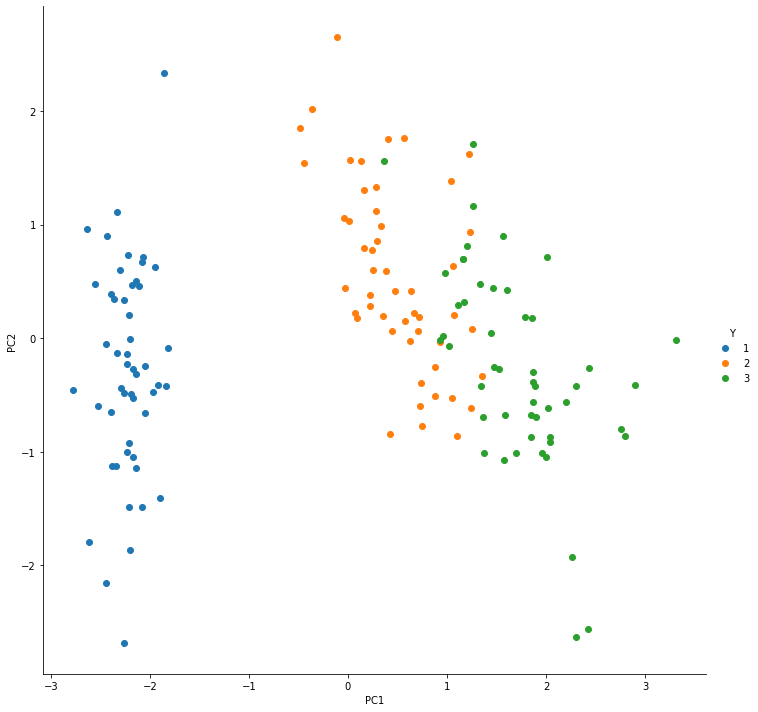

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#read dataset
df=pd.read_csv('/content/sample_data/iris.csv')
df.head()

#standardize the data 
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

y=df['species']


#covariance matrix
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

#calculating eigen values and eigen vector
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

vectors[:5]

explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values))*100)

print("variances of each feature",explained_variances)

#bar graph
plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')




projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()


#scatter graph

sns.FacetGrid(res, hue="Y", height=10).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()